In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
model_merged_feats_path = {'full_bayesian': './projects/full_bayesian/reports/full_bayesian_KORA_v2/KORA/10_1571866968.4002764_concat_report_final.csv',
    'full_bayesian_0dot01': './projects/full_bayesian/reports/full_bayesian_KORA_v4/KORA/10_1572514598.527084_concat_report_final.csv',
    'MC_dropout_quicknat': './projects/MC_dropout_quicknat/reports/MC_dropout_quicknat_KORA_v2/KORA/10_1572006141.7793334_concat_report_final.csv', 
    'probabilistic_quicknat': './projects/probabilistic_quicknat/reports/probabilistic_quicknat_KORA_v2/KORA/10_1571996796.7963011_concat_report_final.csv', 
    'hierarchical_quicknat': './projects/hierarchical_quicknat/reports/hierarchical_quicknat_KORA_v2/KORA/10_1571905560.9377904_concat_report_final.csv'}


In [11]:
df = pd.read_csv(f'full_bayesian_sample_out_qc.csv')
df_o = pd.read_csv('./projects/full_bayesian/reports/full_bayesian_KORA_v2/KORA/10_1571866968.4002764_concat_report_final.csv')

In [12]:
feats = ['volume_id', 'iou_spleen', 'iou_liver', 'iou_mean', 'dice_spleen',
       'dice_liver', 'dice_mean', 'surface_distance_prtogt_spleen',
       'surface_distance_prtogt_liver', 'surface_distance_prtogt_mean',
       'surface_distance_gttopr_spleen', 'surface_distance_gttopr_liver',
       'surface_distance_gttopr_mean', 'surface_distance_avg_spleen',
       'surface_distance_avg_liver', 'surface_distance_avg_mean']

df_o = df_o[feats]

In [13]:
df_merged_final = pd.merge(df, df_o, how='inner', on=['volume_id'])

qc vs sd: 0.5347820317290217


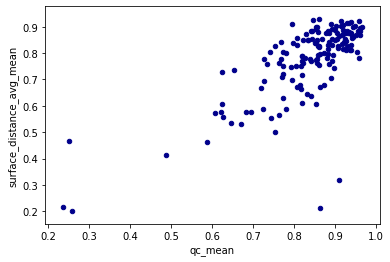

qc vs dice: 0.5415479856923017


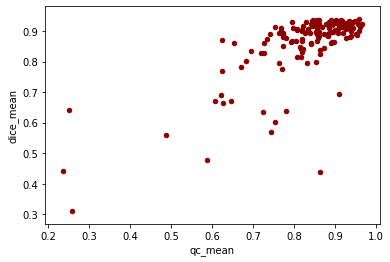

qc vs iou: 0.6896817069745698


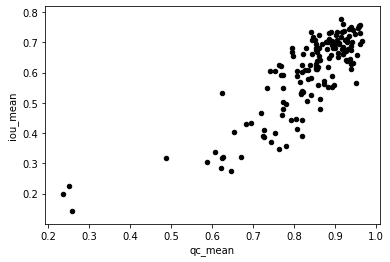

In [15]:
df = df_merged_final
# df = rename(df)
# df = transform_to_categorical(df, ['diabetes_status', 'sex'])
# df, normalised_cols = z_score_column_normalise(df, ['seg_spleen', 'seg_liver'])
df = df.fillna(0)


df.plot.scatter(x='qc_mean', y='surface_distance_avg_mean',c='DarkBlue')
X, y = df['qc_mean'].values.reshape(-1,1),df['surface_distance_avg_mean'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print('qc vs sd:', reg.score(X, y))
plt.show()
df.plot.scatter(x='qc_mean', y='dice_mean',c='DarkRed')
X, y = df['qc_mean'].values.reshape(-1,1),df['dice_mean'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print('qc vs dice:', reg.score(X, y))
plt.show()

df.plot.scatter(x='qc_mean', y='iou_mean',c='Black')
X, y = df['qc_mean'].values.reshape(-1,1),df['iou_mean'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print('qc vs iou:', reg.score(X, y))
plt.show()